In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from DataFrameTransform import DataFrameTransform

# Load data into df
df = pd.read_csv('C:/Users/Lara/.vscode/EDA_project_customer_loans_in_finance/milestone_1/transformed_data.csv')

In [ ]:

df_transformer = DataFrameTransform(df)

df_transformer.drop_columns_with_many_nulls()

df_transformer.impute_randomly_columns()

df_transformer.impute_mean_columns()

transformed_df = df_transformer.df

## Plotter

Information about the skewdness of the values in the DataFrame must be presented and visualised in order to evaluate the method needed to transform the data. Any outliers and highly correlated columns must also be identified and visualised. 

In [96]:

# Calculate skewness for each column of numerical data
numerical_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

skewness_values = transformed_df[numerical_columns].skew()

display(skewness_values)

loan_amount                 0.805259
funded_amount               0.845563
funded_amount_inv           0.813927
int_rate                    0.433193
instalment                  0.996981
annual_inc                  8.711831
dti                         0.189420
delinq_2yrs                 5.370002
inq_last_6mths              3.248918
open_accounts               1.059282
total_accounts              0.779014
out_prncp                   2.356426
out_prncp_inv               2.356848
total_payment               1.267891
total_payment_inv           1.256197
total_rec_prncp             1.261015
total_rec_int               2.204322
total_rec_late_fee         13.184305
recoveries                 14.589793
collection_recovery_fee    27.636843
last_payment_amount         2.499381
dtype: float64

In [97]:
# calculate the skewdness of each column and identify columns that exceed the skew threshold

skew_threshold = 0.8

skewness = transformed_df[numerical_columns].apply(lambda x: x.skew())

skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()

print("Skewed Columns:")
print(skewed_columns)


Skewed Columns:
['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']


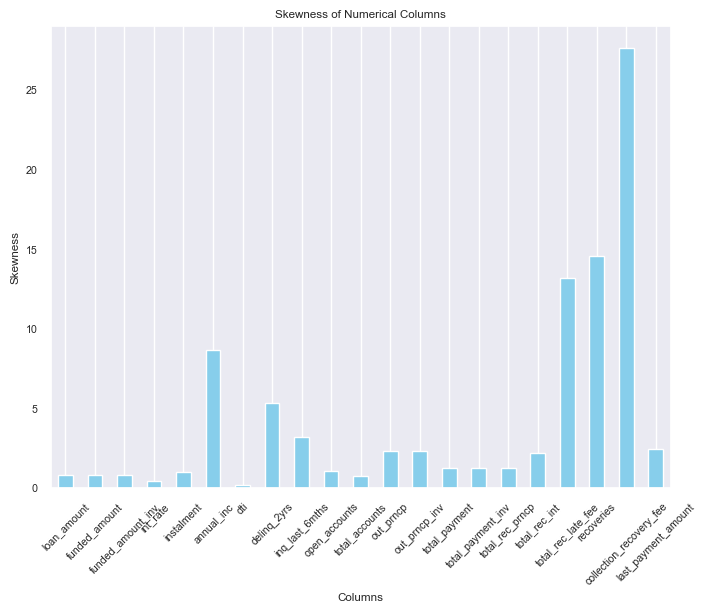

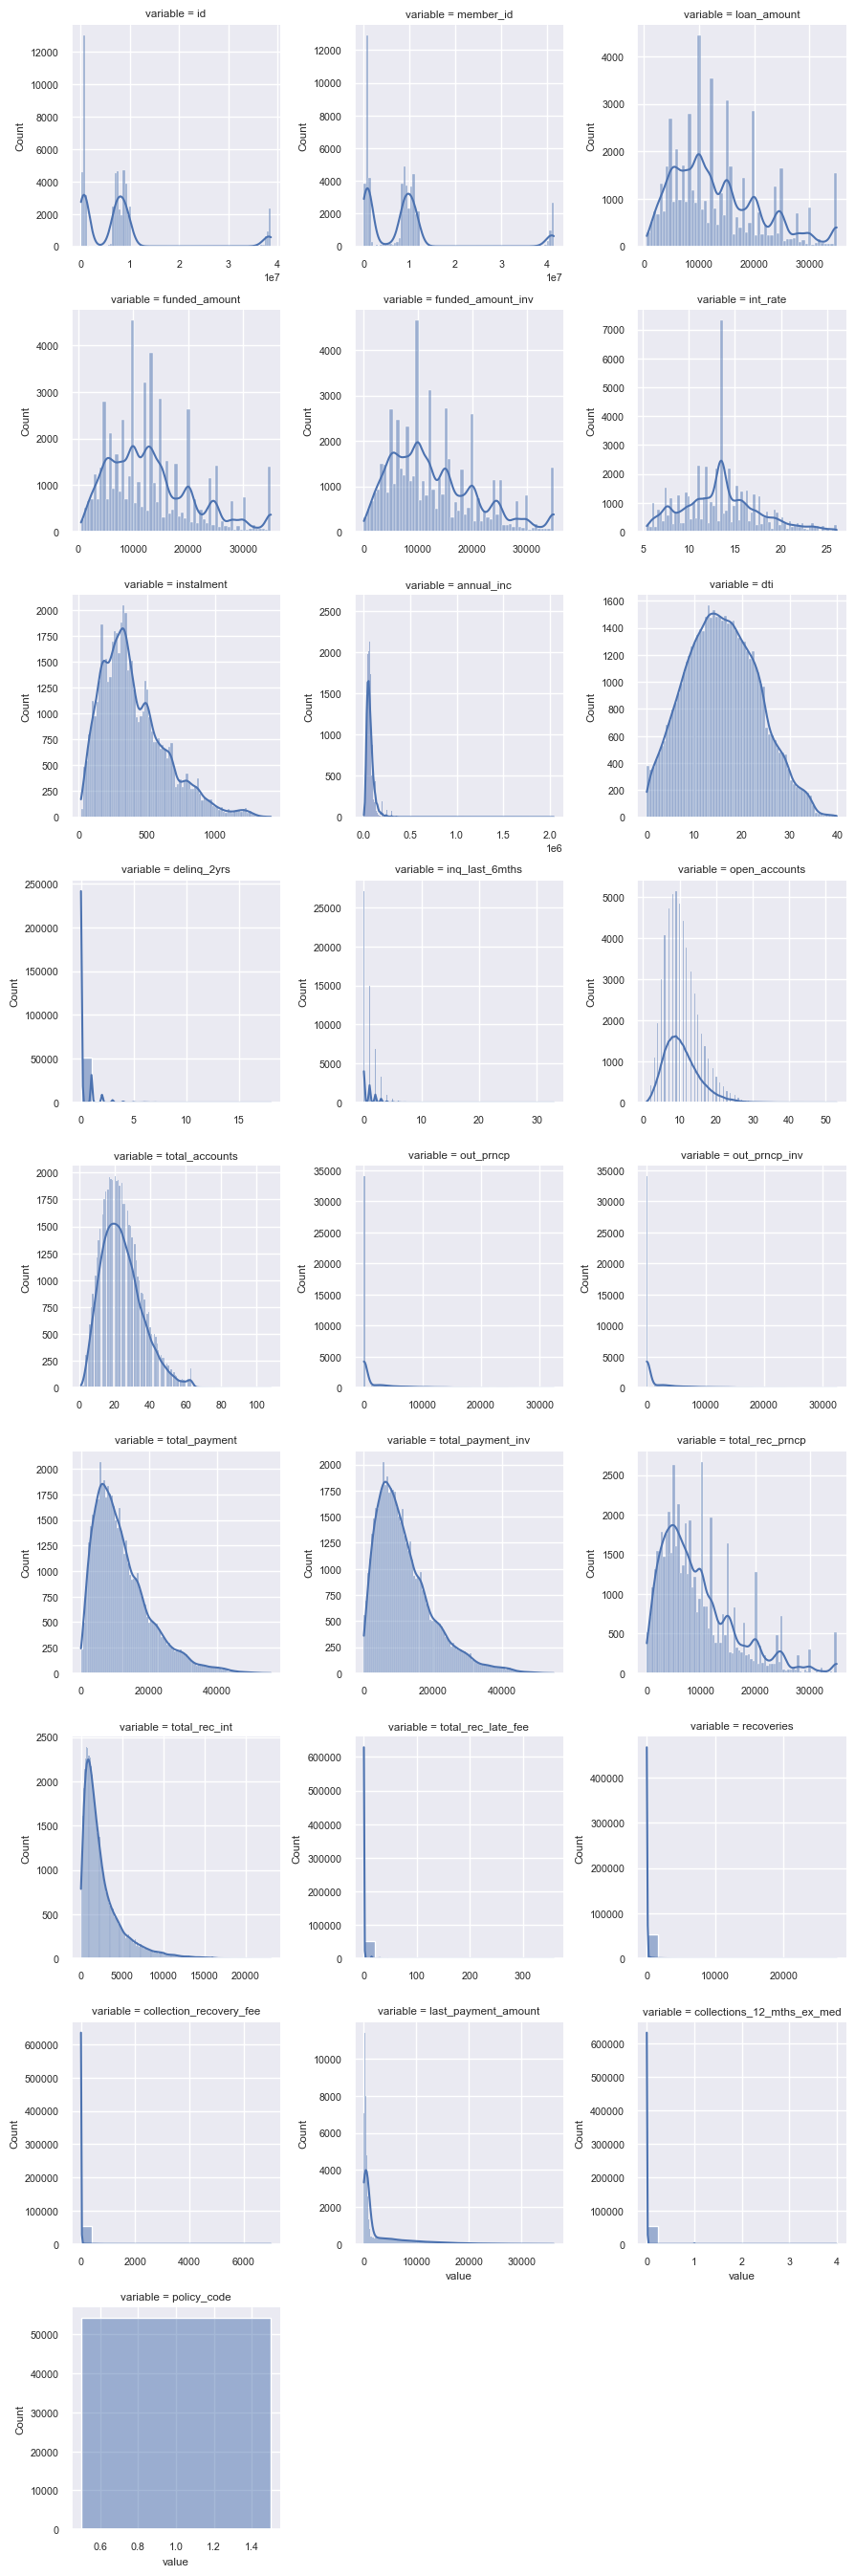

In [98]:
class DataFrameSkewAnalyzer:
    def visualize_skew(self, transformed_df):
        numerical_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']
        
        skewness = transformed_df[numerical_columns].skew() 

        plt.figure(figsize=(8, 6))
        skewness.plot(kind='bar', color='skyblue')
        plt.title('Skewness of Numerical Columns')
        plt.xlabel('Columns')
        plt.ylabel('Skewness')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

    def visualize_skew_sns(self, transformed_df):
        numeric_features = [col for col in transformed_df.columns if transformed_df[col].dtype in ['int64', 'float64']]

        sns.set(font_scale=0.7)
        f = pd.melt(transformed_df[numeric_features].reset_index(), id_vars="index", value_vars=numeric_features)
        g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
        g = g.map(sns.histplot, "value", kde=True)

        plt.show()



analyzer = DataFrameSkewAnalyzer()
analyzer.visualize_skew(transformed_df)
analyzer.visualize_skew_sns(transformed_df)

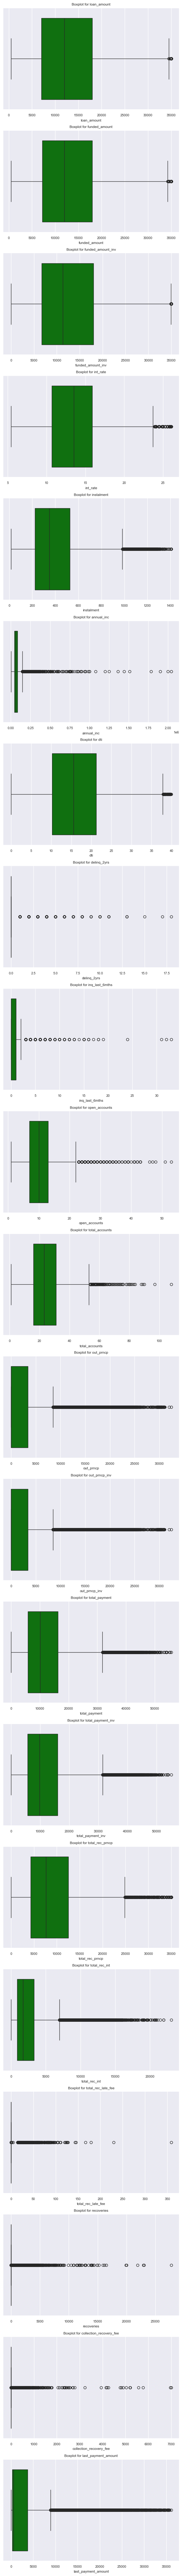

In [99]:
# Identification and visualisation of outliers
numerical_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

# Plot size
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(6, 4 * len(numerical_columns)))

# create a boxplot
for i, column_name in enumerate(numerical_columns):
    sns.boxplot(x=df[column_name], ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot for {column_name}')

plt.tight_layout()
plt.show()

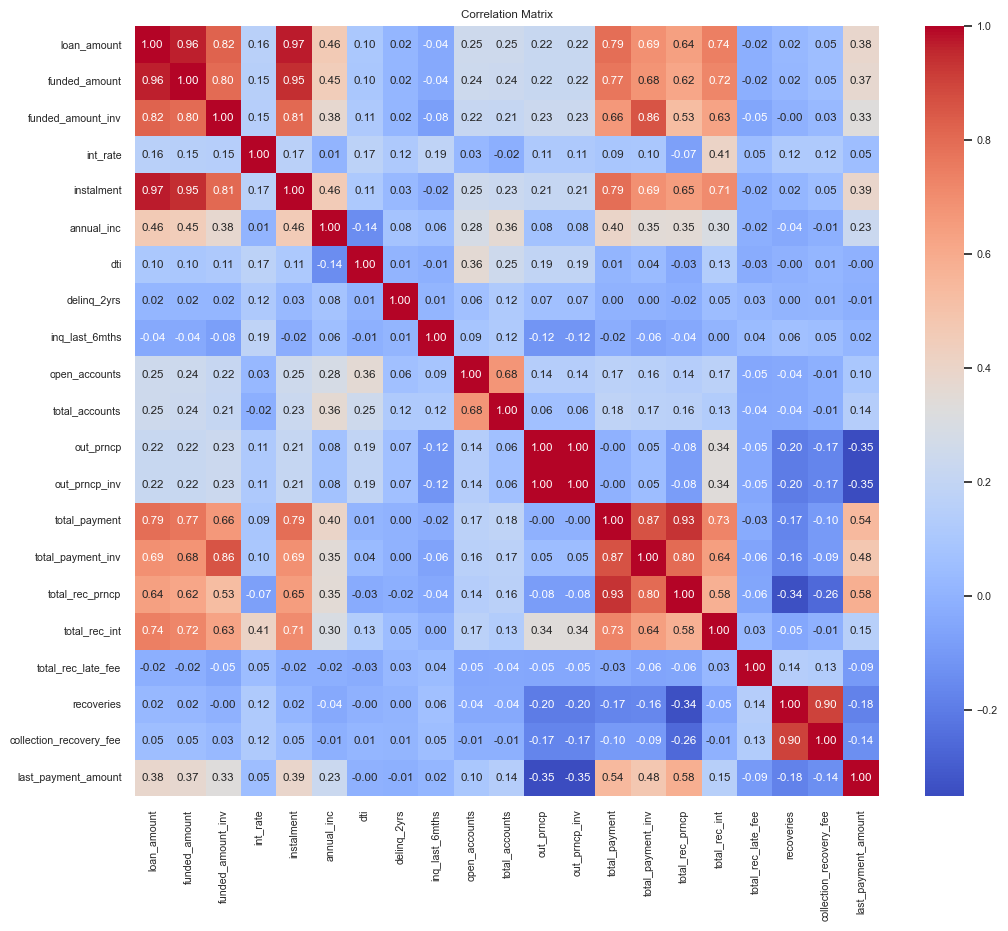

In [106]:
# Compute and visualise correlation matrix

correlation_matrix = transformed_df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [107]:
# Identify highly correlated variables via a correlation threshold and mask
corr_threshold = 0.90

# Create a mask to identify highly correlated features
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1) == 1)

# Find highly correlated columns
highly_correlated_columns = [column for column in upper.columns if any(upper[column] > corr_threshold)]

# Display the highly correlated columns
print("Highly Correlated Columns:", highly_correlated_columns)

Highly Correlated Columns: ['funded_amount', 'instalment', 'out_prncp_inv', 'total_rec_prncp', 'collection_recovery_fee']


## DataFrameTransform

In order to increase the accuracy and validity of the data, the skewdness of the DataFrame must be reduced and any outliers removed.
To reduce the skew, a log transfromatin can be applied to the columns that are over the skew threshold and that display a positive distribution.


In [100]:
# Log transformations of columns

numerical_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

class DataFrameTransformSkew:
    def __init__(self, transformed_df):
        self.df = transformed_df

    def identify_skewed_columns(self, skew_threshold=0.8):
        # Identify columns with skewness greater than the threshold
        skewness = self.df[numerical_columns].apply(lambda x: x.skew())
        skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()
        return skewed_columns

    def transform_skewed_columns(self, columns=None, transformation='log'):
        # If columns are not specified, use all numeric columns
        if columns is None:
            columns = self.df.select_dtypes(include=['number']).columns.tolist()

        # Perform transformations on specified columns
        for column in columns:
            if transformation == 'log':
                self.df[column] = np.log1p(self.df[column])


df_transformer = DataFrameTransformSkew(df)
skewed_cols = df_transformer.identify_skewed_columns()
df_transformer.transform_skewed_columns(columns=skewed_cols, transformation='log')



In [102]:
numerical_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

skewness_values = df[numerical_columns].skew()

display(skewness_values)

loan_amount               -0.677136
funded_amount             -0.737286
funded_amount_inv         -3.317290
int_rate                   0.433193
instalment                -0.656373
annual_inc                 0.137822
dti                        0.189420
delinq_2yrs                2.561991
inq_last_6mths             0.702543
open_accounts             -0.277296
total_accounts             0.779014
out_prncp                  0.577073
out_prncp_inv              0.577147
total_payment             -1.283796
total_payment_inv         -2.915550
total_rec_prncp           -1.883474
total_rec_int             -0.922604
total_rec_late_fee         5.518689
recoveries                 3.785393
collection_recovery_fee    5.270954
last_payment_amount        0.114846
dtype: float64

In [103]:
# Removal of outliers

def remove_outliers_iqr(df, numerical_columns, multiplier=1.5):
    for column_name in numerical_columns:
        # Calculate Q1 and Q3
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


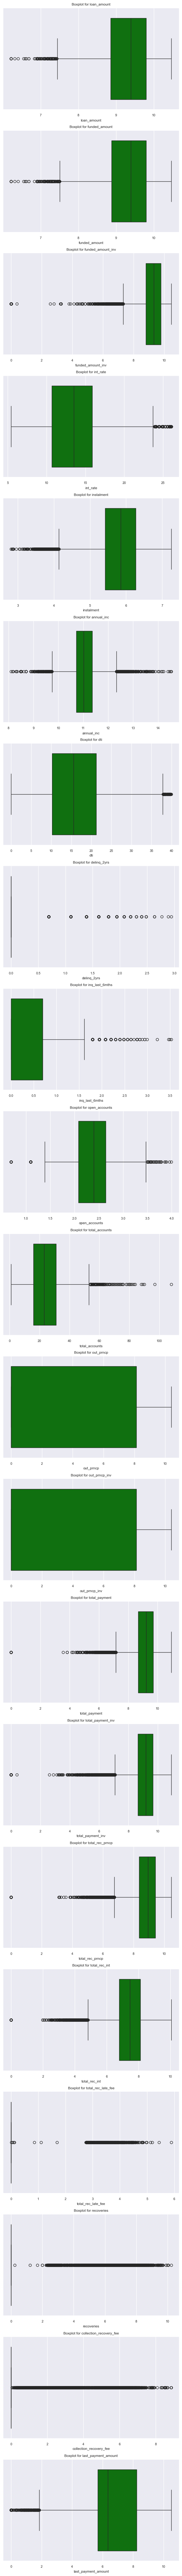

In [104]:
# visualisation of outliers after transformation
numerical_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

# Set the size of each individual plot
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(6, 4 * len(numerical_columns)))

# Loop through each numerical column and create a boxplot
for i, column_name in enumerate(numerical_columns):
    sns.boxplot(x=df[column_name], ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot for {column_name}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [108]:
# Identify highly correlated columns via a correlation threshold and mask
corr_threshold = 0.90

# Create a mask to identify highly correlated features
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1) == 1)

# Find highly correlated columns
highly_correlated_columns = [column for column in upper.columns if any(upper[column] > corr_threshold)]

# Display the highly correlated columns
print("Highly Correlated Columns:", highly_correlated_columns)

Highly Correlated Columns: ['funded_amount', 'instalment', 'out_prncp_inv', 'total_rec_prncp', 'collection_recovery_fee']


In [ ]:
# Remove highly correlated columns
df_no_high_corr = df.drop(columns=highly_correlated_columns) 
